## Deteccion de colores

### Detección azul

In [6]:
# Importar librerias
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

cap = cv.VideoCapture(0)

# HSV azul
azul_bajo = np.array([90, 100, 50], np.uint8)
azul_alto = np.array([125, 255, 255], np.uint8)

while cap.isOpened():
    ret, frame = cap.read()
    
    if ret:
        
        img_hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        
        mask = cv.inRange(img_hsv, azul_bajo, azul_alto)
        res = cv.bitwise_and(frame, frame, mask = mask)
        cv.imshow("Original", frame)
        cv.imshow("Mascara", mask)
        cv.imshow("Resultado", res)
        
        if cv.waitKey(10) & 0xFF==ord('q'):
            break
    else:
        break
cap.release()
cv.destroyAllWindows()


### Deteccion naranja

In [8]:
# Importar librerias
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

cap = cv.VideoCapture(0)

# HSV naranja
naranja_bajo = np.array([5, 100, 50], np.uint8)
naranja_alto = np.array([20, 255, 255], np.uint8)

while cap.isOpened():
    ret, frame = cap.read()
    
    if ret:
        
        img_hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        
        mask = cv.inRange(img_hsv, naranja_bajo, naranja_alto)
        res = cv.bitwise_and(frame, frame, mask = mask)
        cv.imshow("Original", frame)
        cv.imshow("Mascara", mask)
        cv.imshow("Resultado", res)
        
        if cv.waitKey(10) & 0xFF==ord('q'):
            break
    else:
        break
cap.release()
cv.destroyAllWindows()


### Deteccion verde

In [10]:
# Importar librerias
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

cap = cv.VideoCapture(0)

# HSV verde
verde_bajo = np.array([40, 100, 50], np.uint8)
verde_alto = np.array([80, 255, 255], np.uint8)

while cap.isOpened():
    ret, frame = cap.read()
    
    if ret:
        
        img_hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        
        mask = cv.inRange(img_hsv, verde_bajo, verde_alto)
        res = cv.bitwise_and(frame, frame, mask = mask)
        cv.imshow("Original", frame)
        cv.imshow("Mascara", mask)
        cv.imshow("Resultado", res)
        
        if cv.waitKey(10) & 0xFF==ord('q'):
            break
    else:
        break
cap.release()
cv.destroyAllWindows()

## Transformaciones geometricas con imagenes

### Escalado

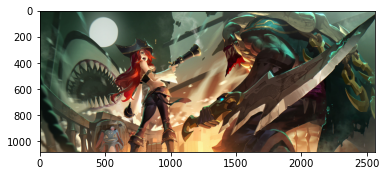

In [13]:
# Importar librerias
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("./imgs/Miss Fortune.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)


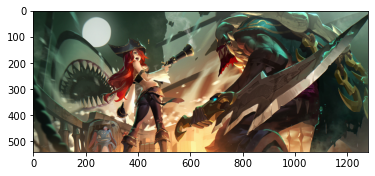

In [16]:
# Escalado metodo 1
img_escal = cv.resize(img, None, fx = 0.5, fy = 0.5, interpolation = cv.INTER_CUBIC)
plt.imshow(img_escal)

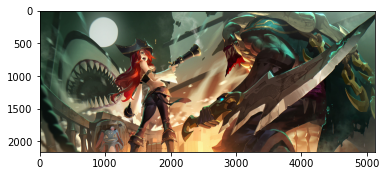

In [18]:
# Escalado metodo 2
h,w,_ =img.shape
result = cv.resize(img,(w*2,h*2), interpolation = cv.INTER_CUBIC)
plt.imshow(result)

### Rotacion

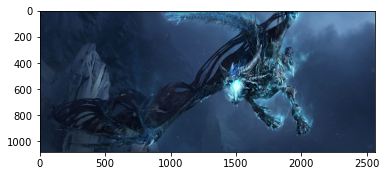

In [19]:
# Importar librerias
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("./imgs/Magic Flyer.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)

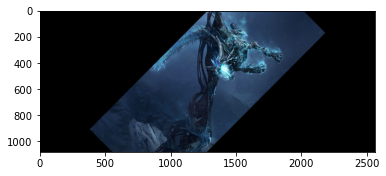

In [30]:
# girar la imagen
fil,col,_ = img.shape

# matriz de rotacion
m = cv.getRotationMatrix2D(((col-1)/2.0,(fil-1)/2.0),45,0.7)

# transformacion de la imagen
result = cv.warpAffine(img, m, (col,fil))
plt.imshow(result)

### Traslación de una imagen

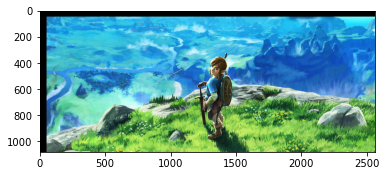

In [38]:
# Importar librerias
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("./imgs/Legends of Zelda.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

fil,col,_ = img.shape
M = np.float32([[1,0,50],[0,1,50]])
result = cv.warpAffine(img, M, (col,fil))
plt.imshow(result)


### Transformacion Affine

(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1.0, 'Salida'))

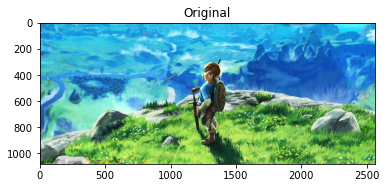

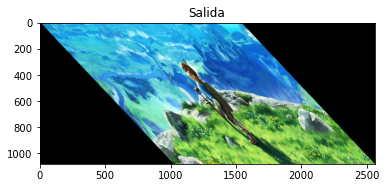

In [44]:
# Importar librerias
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("./imgs/Legends of Zelda.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure(1)
plt.imshow(img), plt.title("Original")

fil,col,_ = img.shape

# Puntos de entrada
src_points = np.float32([[0,0],[col-1,0],[0,fil-1]])

# Puntos de salida
dst_points = np.float32([[0,0],[int(0.6*(col-1)),0],[int(0.4*(col-1)),fil-1]])

# matriz de transformacion Afin
matriz_afin = cv.getAffineTransform(src_points, dst_points)

# Transformacion
output = cv.warpAffine(img,matriz_afin,(col,fil))

# Salida

plt.figure(2), plt.imshow(output), plt.title("Salida")
                         

### Espejo de una imagen

(<Figure size 432x288 with 1 Axes>,
 Text(0.5, 1.0, 'Salida'))

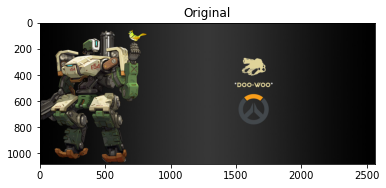

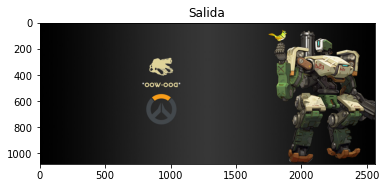

In [46]:
# Importar librerias
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("./imgs/Overwatch 1.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure(1)
plt.imshow(img), plt.title("Original")

fil,col,_ = img.shape

# Puntos de entrada
src_points = np.float32([[0,0],[col-1,0],[0,fil-1]])

# Puntos de salida
dst_points = np.float32([[col-1,0],[0,0],[col-1, fil-1]])

# matriz de transformacion Afin
matriz_afin = cv.getAffineTransform(src_points, dst_points)

# Transformacion
output = cv.warpAffine(img,matriz_afin,(col,fil))

# Salida

plt.figure(2), plt.imshow(output), plt.title("Salida")

### Transformacion de perspectiva

(<matplotlib.image.AxesImage at 0x1e784fd6460>, Text(0.5, 1.0, 'Original'))

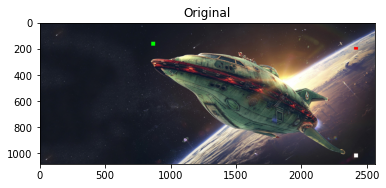

In [57]:
# Importar librerias
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("./imgs/Futurama.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Arriba izquiera verde
img[150:180,850:880]=[0,255,0]

# Arriba derecha rojo
img[190:210,2400:2430]=[255,0,0]

# Abajo izquierda azul
img[740:730,850:880]=[0,0,255]

# Abajo derecha blanco
img[1000:1030,2400:2430]=[255,255,255]

plt.imshow(img), plt.title("Original")


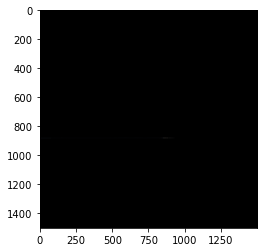

In [71]:
pts1 = np.float32([[150,850],[190,2400],[740,850],[1000,2400]])
pts2 = np.float32([[180,880],[210,2430-1],[730-1,880],[1030-1,880-1]])
matriz = cv.getPerspectiveTransform(pts1,pts2)
output = cv.warpPerspective(img, matriz,(1500,1500))

plt.imshow(output)

## Umbralizacion de imagenes

### Umbralizacion simple

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1e788b8ae50>)

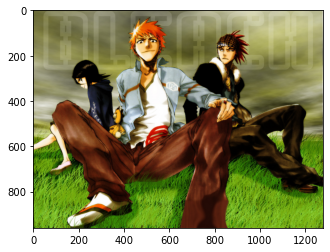

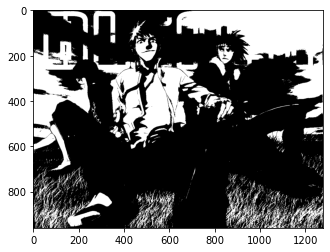

In [73]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('./imgs/wallpaper-175109.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

ret,th1 = cv.threshold(img2,127,255,cv.THRESH_BINARY)

plt.figure(1),plt.imshow(img)
plt.figure(2),plt.imshow(th1, cmap="gray")
